# The Problem Statement

### Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### The Ask

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',50)
plt.rcParams['figure.figsize'] =[10,8]

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Exploratory Data Analysis

### Procedure

1. Univariate Analysis
2. Bivariate Analysis (x VS y)
3. Missing Values
4. Outlier Treatment
5. Feature Engineering
6. Scaling and Transformation

7. Model building
  Base Models : They are the basic models as seen in regression- the average models are base models. We will be comparing the models with base models. These are just like bench mark models where the models build must be atleast better than the base models.

8. Start with basic models like Logistic Regression
9. Then with Decision Tree
10. Do not base your model accuracy on Train and Test split but on KFOld cross validation. This is for all the models.
11. Pick the Top 3 or 4 models and then do Parameter tuning.
12. Before coming out with final decision, build stacking models.   

**Univariate Analysis**

In [ ]:
df_titanic= pd.concat([train,test],ignore_index=True)

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Before treating missing values**

<Axes: >

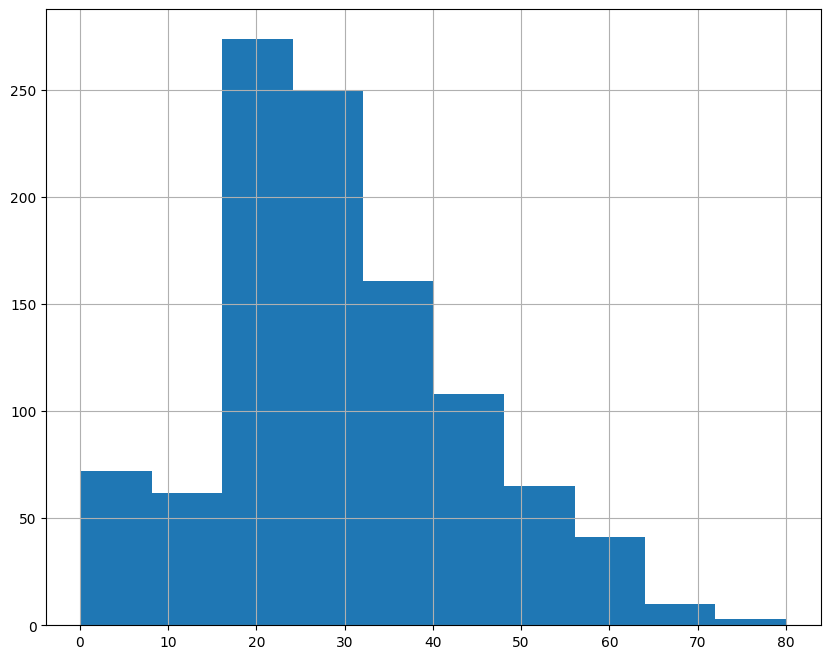

In [ ]:
df_titanic['Age'].hist()

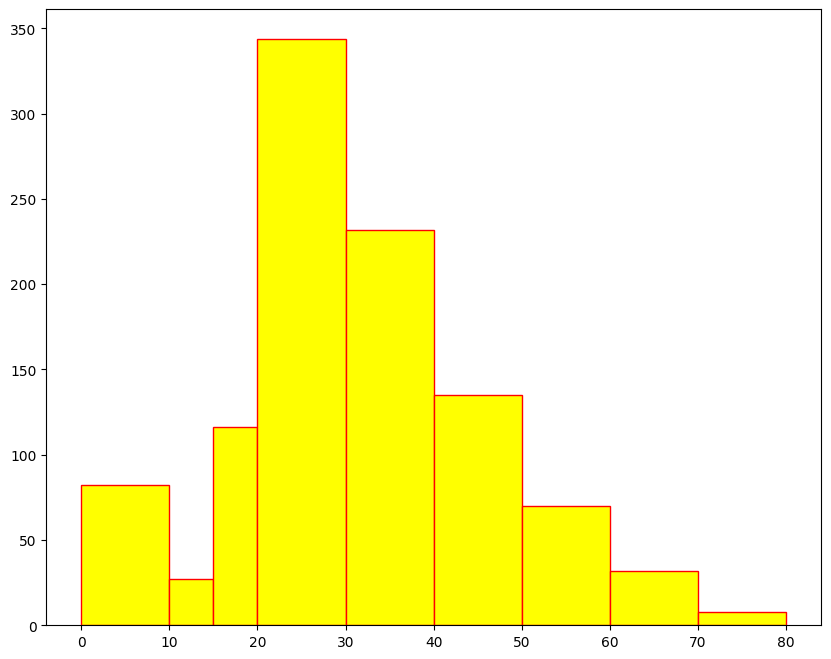

In [ ]:
plt.hist(x='Age', data=df_titanic,bins=[0,10,15,20,30,40,50,60,70,80], color='yellow', edgecolor='red'),
plt.show()

<Axes: >

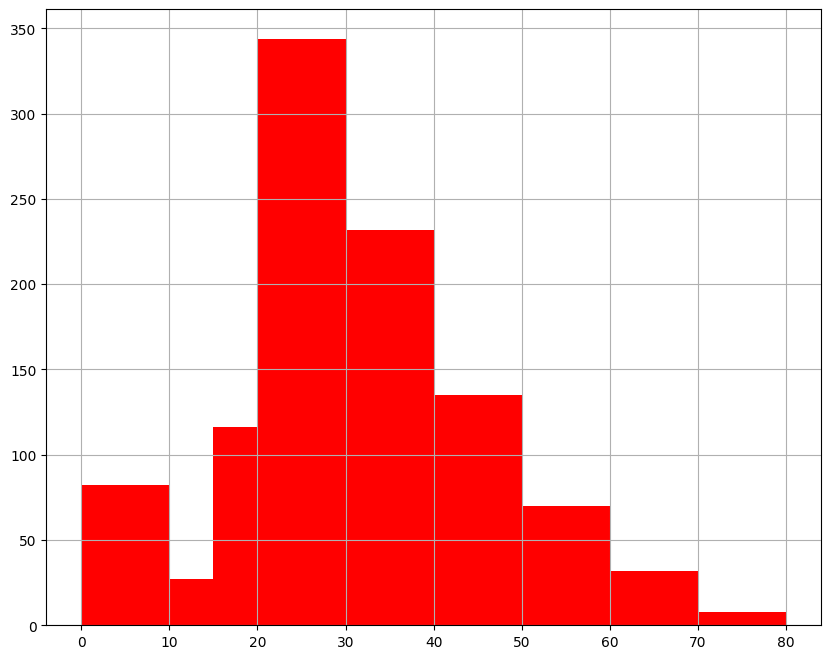

In [ ]:
df_titanic['Age'].hist(bins=[0,10,15,20,30,40,50,60,70,80],color='red')

<Axes: xlabel='Age', ylabel='Density'>

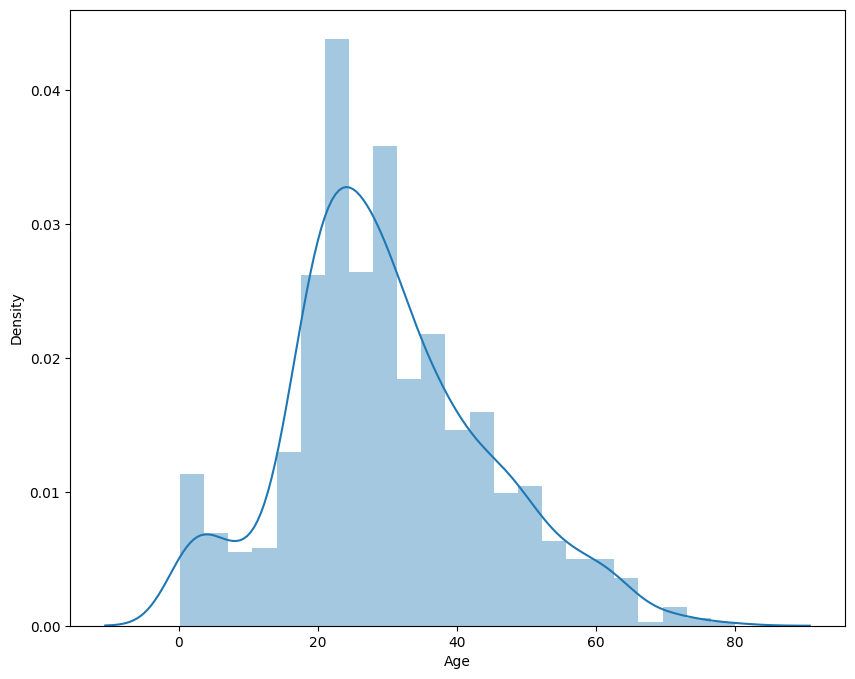

In [ ]:
sns.distplot(df_titanic['Age'])

Inference:
1. There were several people above the mid age group > 35 years.
2. The data is skewed to the right.

In [ ]:
me = df_titanic['Age'].mean()
md = df_titanic['Age'].median()
mo = df_titanic['Age'].mode()[0]

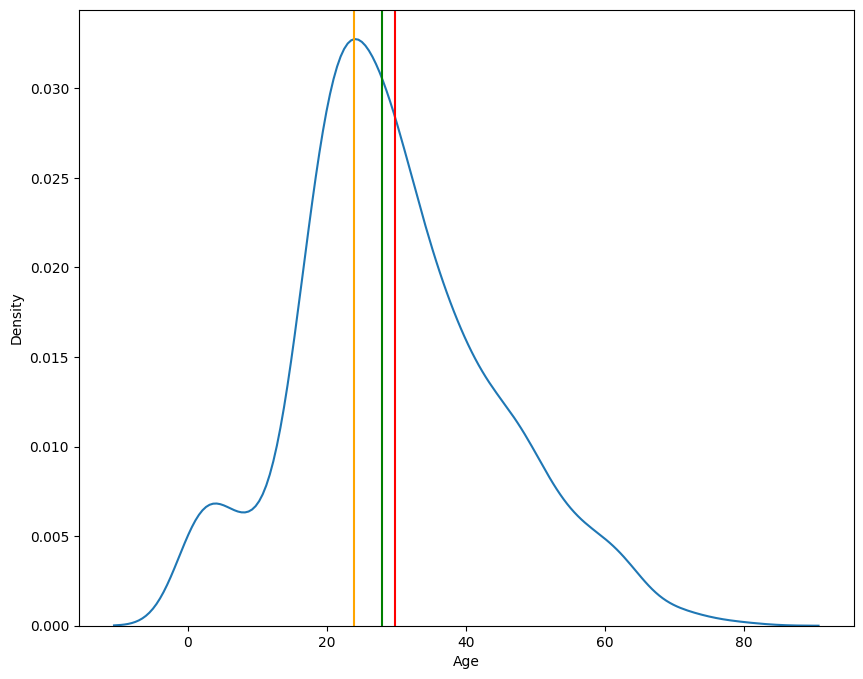

In [ ]:
#diplay mean. median and mode
sns.kdeplot(df_titanic['Age']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

In [ ]:
print("skewness is ", df_titanic['Age'].skew())
print("Kurtosis is ", df_titanic['Age'].kurtosis())

skewness is  0.40767455974362266
Kurtosis is  0.1469476357378139


In [ ]:
df_titanic['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Inference:-
1. Looking at the Minimum age, there are kids
2. There are elderly people of the Age -80.
3. 50% of the people are below 28 years of Age.

<Axes: >

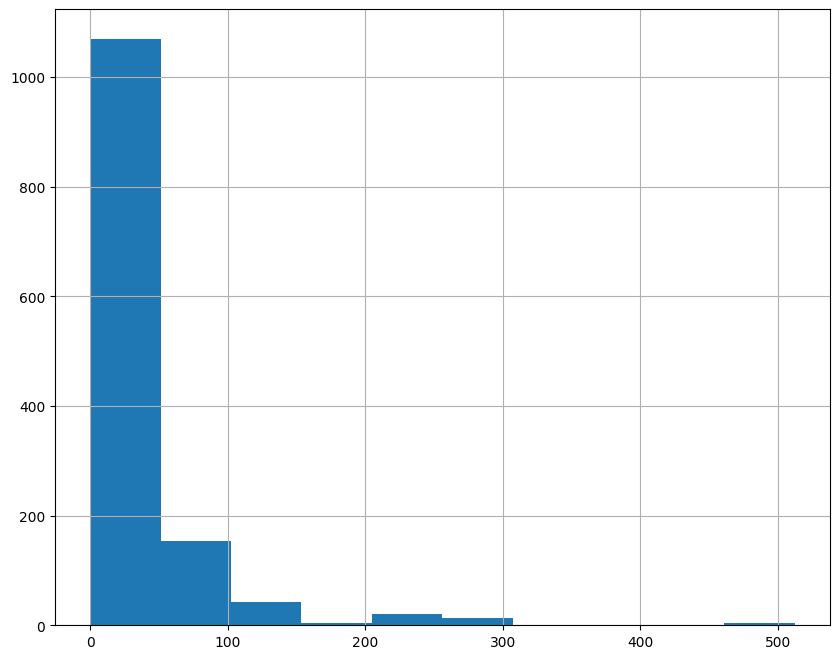

In [ ]:
df_titanic['Fare'].hist()

<Axes: >

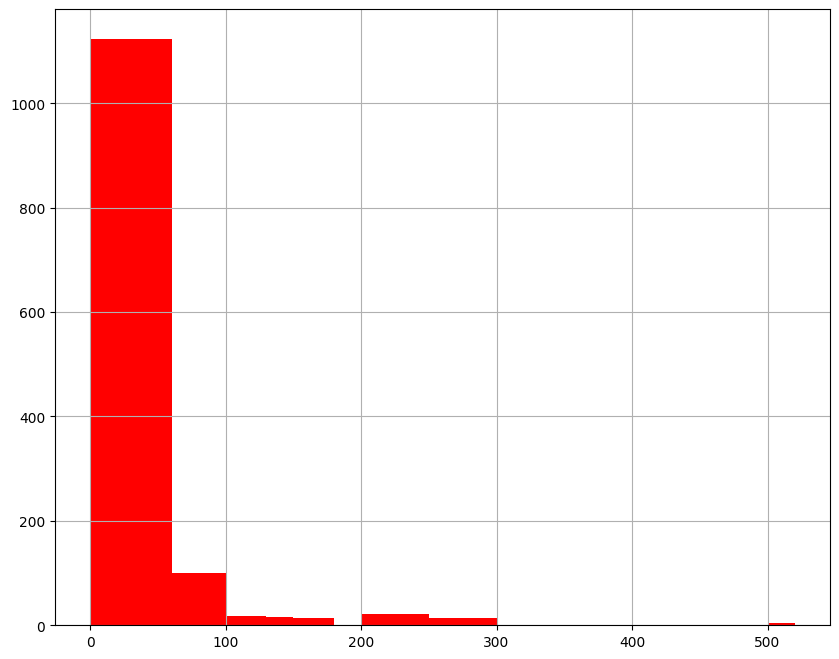

In [ ]:
df_titanic['Fare'].hist(bins=[0,60.80,100,130,150,180,200,250,300,400,480,500,520],color='red')

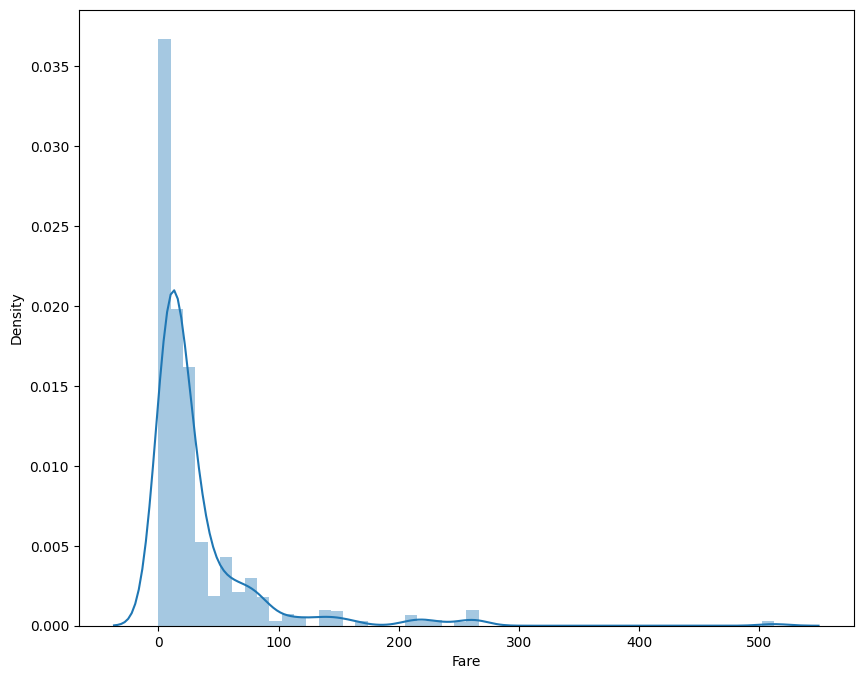

In [ ]:
sns.distplot(df_titanic['Fare'])
plt.show()

Inference:
1. Fare is heavily skewed.

In [ ]:
me = df_titanic['Fare'].mean()
md = df_titanic['Fare'].median()
mo = df_titanic['Fare'].mode()[0]

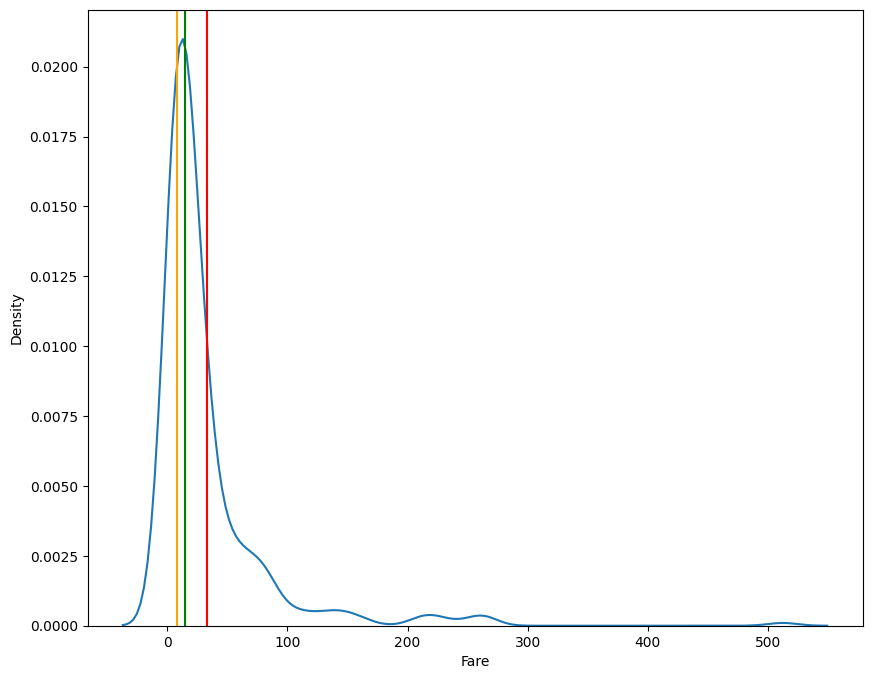

In [ ]:
#diplay mean. median and mode
sns.kdeplot(df_titanic['Fare']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

In [ ]:
print("skewness is ", df_titanic['Fare'].skew())
print("Kurtosis is ", df_titanic['Fare'].kurtosis())

skewness is  4.367709134122922
Kurtosis is  27.027986349442294


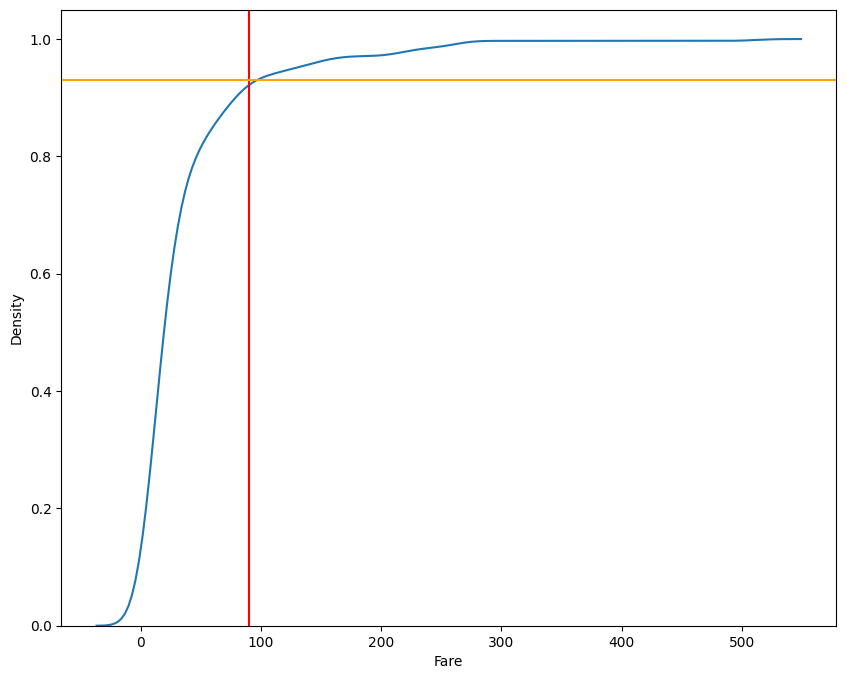

In [ ]:
# cummulative plot and its relevance
sns.kdeplot(x='Fare',data=df_titanic,cumulative=True) ;

plt.axvline(90,color='red')
plt.axhline(0.93,color='orange')

plt.show()

In [ ]:
df_titanic['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

1. Fare is highly skewed.
2. 50% of the fare are above 14.
3. Power transformers can be applied on Fare to make it close to Normal distribution.
4. Can Fare prices be = 0 ?

In [ ]:
df_titanic['Fare'][df_titanic['Fare']==0].count()

17

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


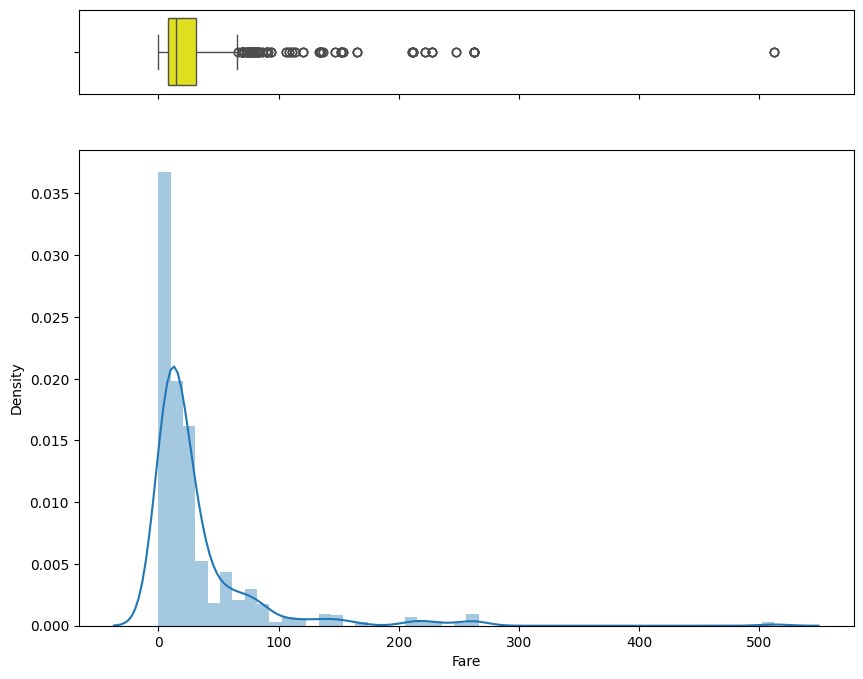

In [ ]:
area, (first_box, second_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_titanic['Fare'], ax=first_box, orient='h',color='yellow')
sns.distplot(df_titanic['Fare'], ax=second_hist)
plt.show()

In [ ]:
num_cols=df_titanic.select_dtypes(include=np.number)
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
num_cols =num_cols[['Age','Fare']]

In [ ]:
plt.rcParams['figure.figsize'] = 10,10

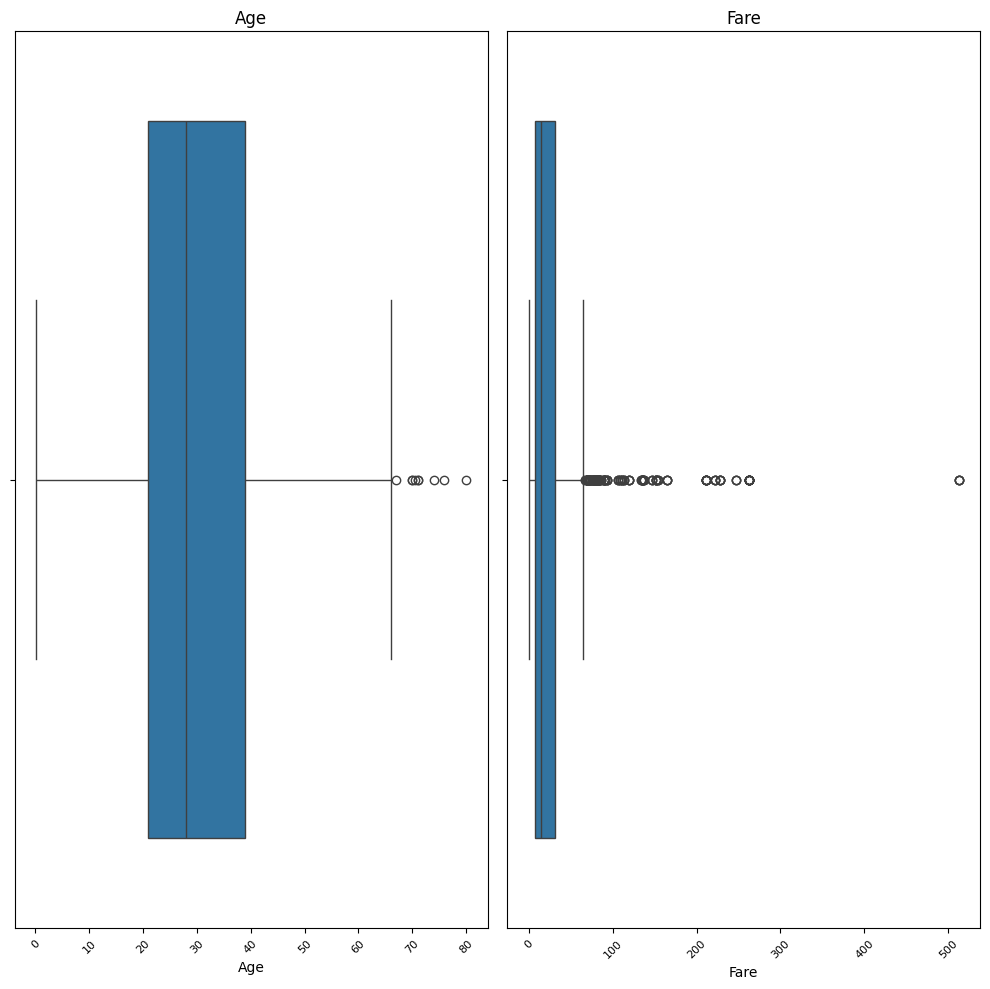

In [ ]:
j=1
for i in num_cols:
  plt.subplot(1,2,j)
  sns.boxplot(x=df_titanic.loc[:,i])
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
cols=['Embarked','Survived','Sex']

In [ ]:
for i in cols:
  df_titanic[i]= df_titanic[i].astype(object)


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


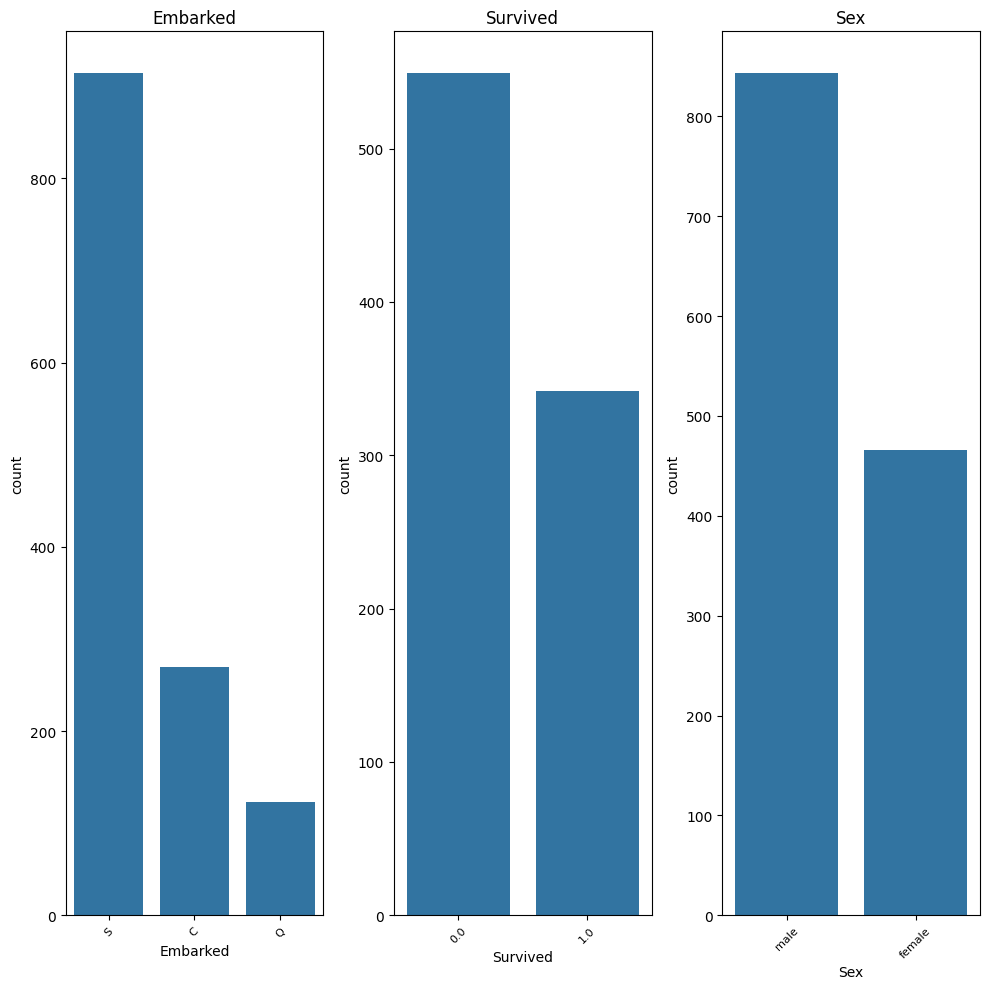

In [ ]:
j=1
for i in cols:
  plt.subplot(1,3,j)
  sns.countplot(x=df_titanic.loc[:,i])
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

Inference:
1. Many of them embarked from Southhampton
2. Many of passengers did not survive.
3. Most of the passengers were from 3rd class.
4. Most of the passengers were travelling solo.
5. Males were more compared to the females.

### Bivariate Analysis

**Numerical vs Categorical**

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [ ]:
num_cols=['Age','Fare']

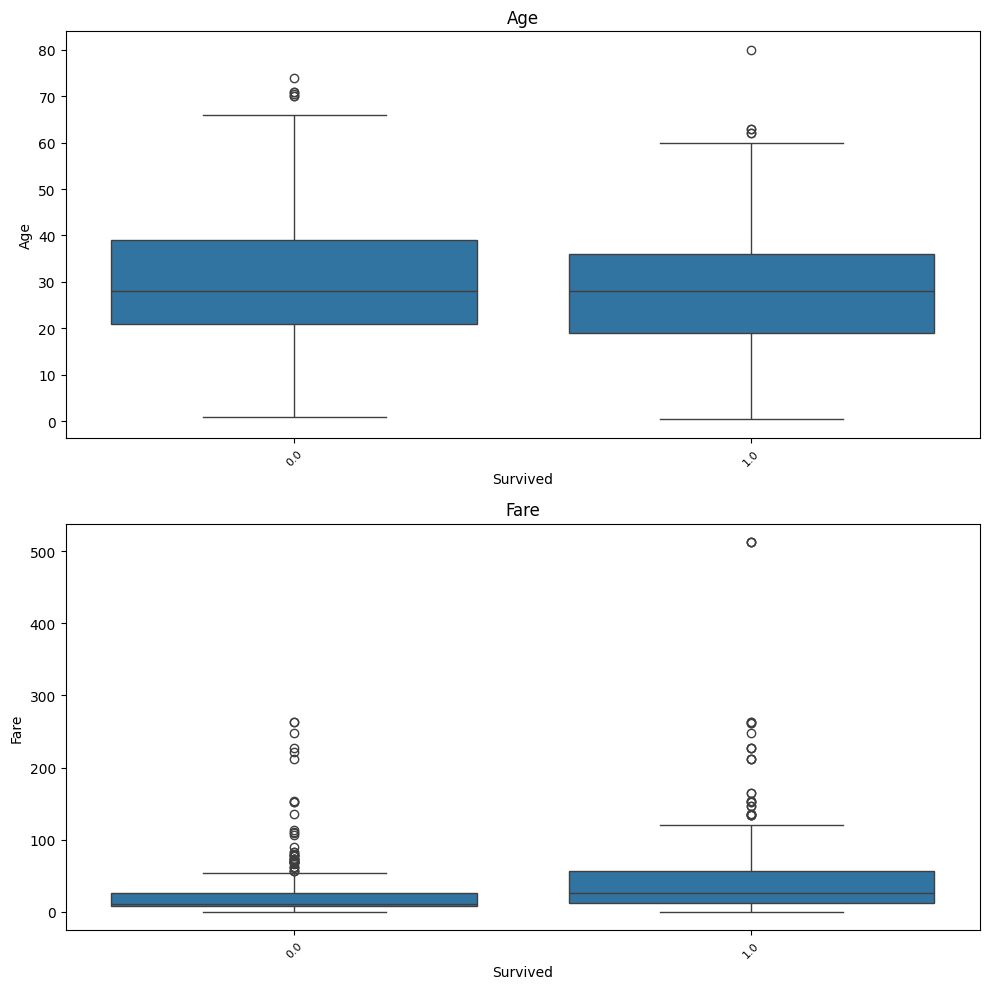

In [ ]:
j=1
for i in num_cols:
  plt.subplot(2,1,j)
  sns.boxplot(x= df_titanic['Survived'] ,y=df_titanic.loc[:,i])
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

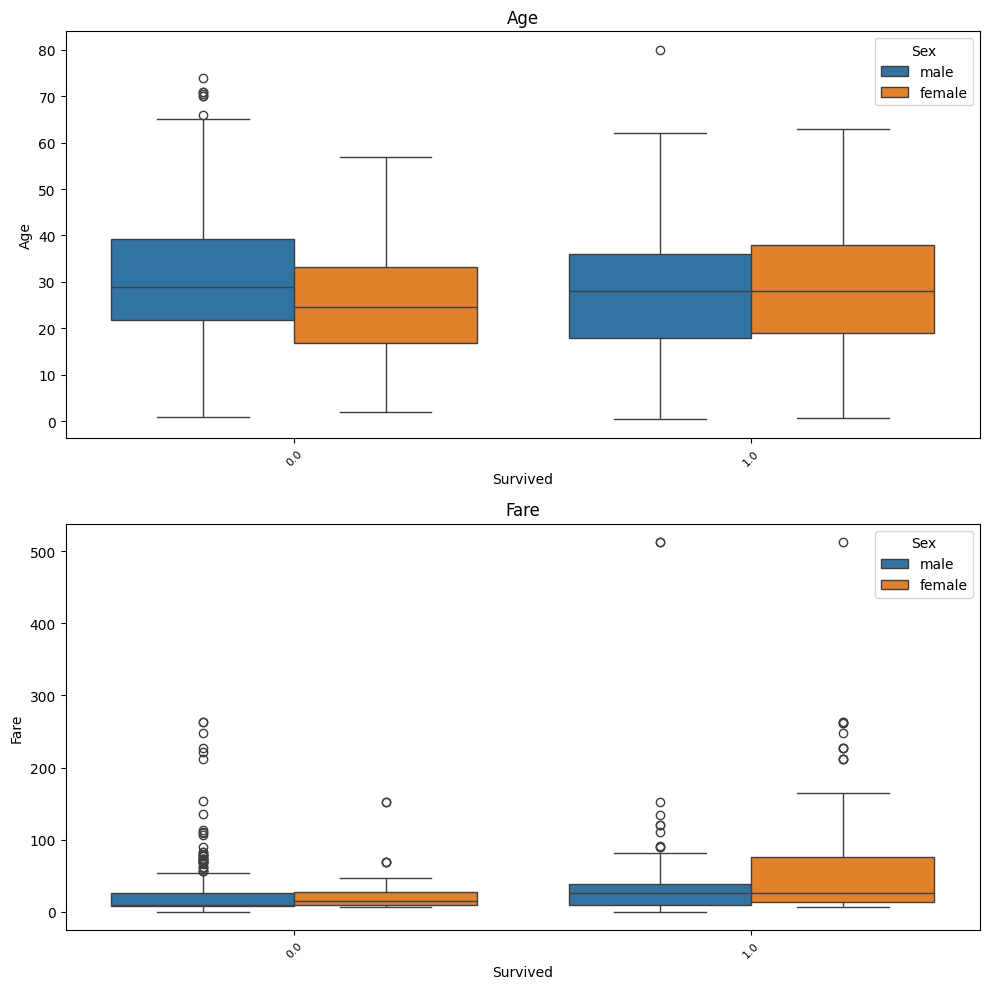

In [ ]:
j=1
for i in num_cols:
  plt.subplot(2,1,j)
  sns.boxplot(x= df_titanic['Survived'] ,y=df_titanic.loc[:,i],hue=df_titanic['Sex'])
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

**Alternate Way using subplots**

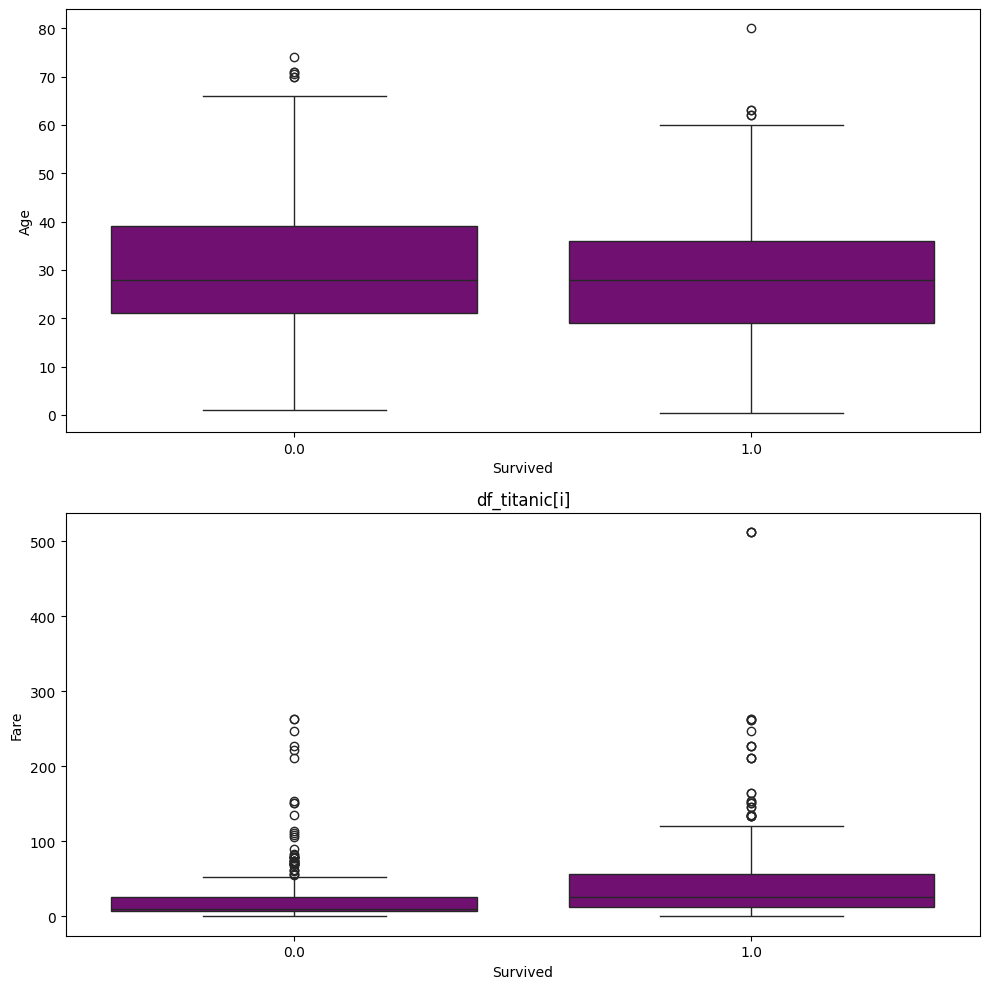

In [ ]:
fig, ax= plt.subplots(2,1, figsize=(10,10))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(y=df_titanic[i],x=df_titanic['Survived'], ax=subplot,color='purple')
    plt.title('df_titanic[i]')

plt.tight_layout()
plt.show()

Inference:-
1. Oldest person to survive is around 80 years.
2. Younger people survived compared to older people.
3. Not much difference in the people who survived with respect to the fares.
4. Age is not the preference as far as surviva. Except for some exemption.

**Lets look at what statistics says**

In [ ]:
df_titanic.groupby("Survived")['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Inference:-
1. Mean of the Fare for people who survived is more compared with the people who did not survive.

In [ ]:
df_titanic.groupby("Survived")['Pclass'].value_counts()

Survived  Pclass
0.0       3         372
          2          97
          1          80
1.0       1         136
          3         119
          2          87
Name: Pclass, dtype: int64

In [ ]:
df_titanic.groupby("Survived")['Pclass'].value_counts(normalize=True)*100

Survived  Pclass
0.0       3         67.759563
          2         17.668488
          1         14.571949
1.0       1         39.766082
          3         34.795322
          2         25.438596
Name: Pclass, dtype: float64

In [ ]:
pd.crosstab(df_titanic['Pclass'] ,df_titanic['Survived'])



Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


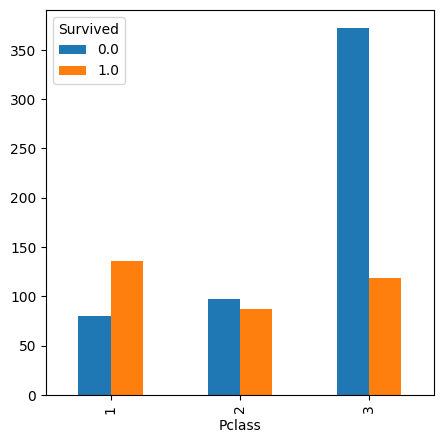

In [ ]:
plt.rcParams['figure.figsize'] =[5,5]
pd.crosstab(index = df_titanic['Pclass'], columns = df_titanic['Survived']).plot(kind='bar')
plt.show()

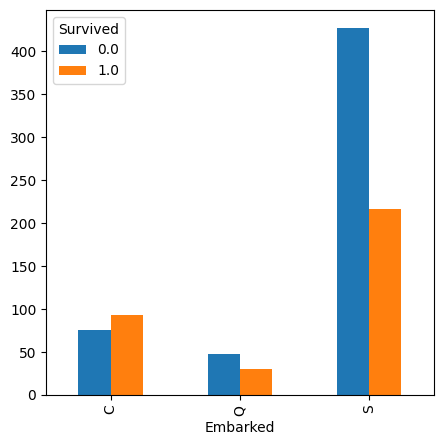

In [ ]:
plt.rcParams['figure.figsize'] =[5,5]
pd.crosstab(index = df_titanic['Embarked'], columns = df_titanic['Survived']).plot(kind='bar')
plt.show()

In [ ]:
pd.crosstab(index = df_titanic['Embarked'], columns = df_titanic['Survived'])

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


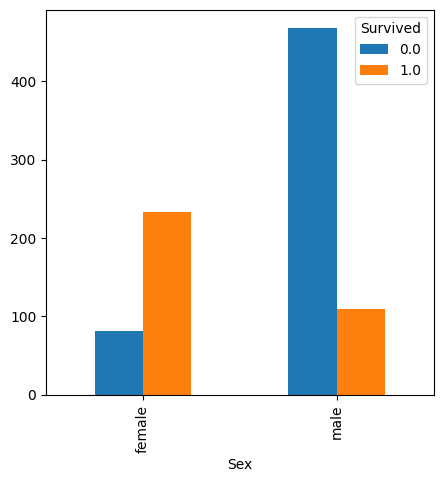

In [ ]:
plt.rcParams['figure.figsize'] =[5,5]
pd.crosstab(index = df_titanic['Sex'], columns = df_titanic['Survived']).plot(kind='bar')
plt.show()

**Use of Plotly to visualize Histogram with respect to Categorical variable**

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(df_titanic,x="Age",color='Embarked')

**Categorical vs Categorical**

In [ ]:
cats=['Embarked','Pclass','SibSp','Parch','Sex']

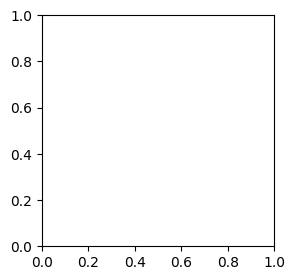

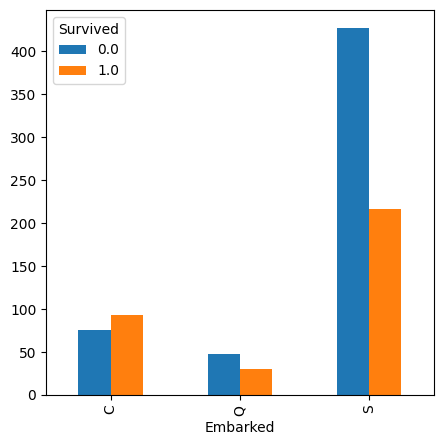

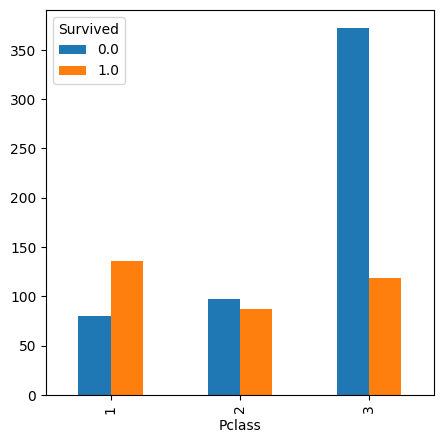

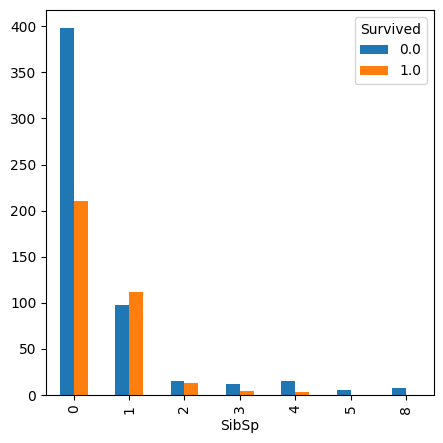

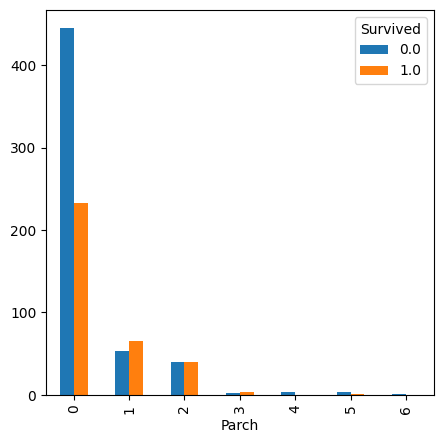

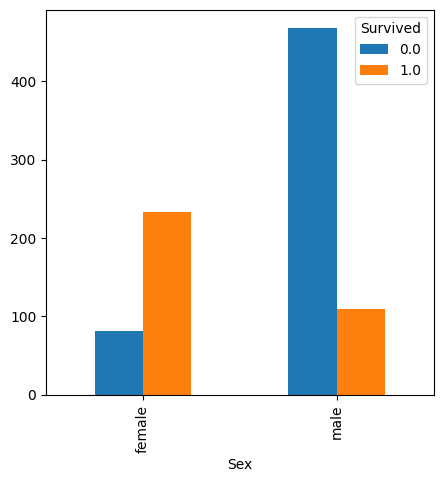

In [ ]:

plt.subplots(figsize=(3,3))
for i in cats:
  pd.crosstab(df_titanic[i],df_titanic['Survived']).plot(kind='bar')
plt.show()

Inference:
1. Class 3 passengers were the ones who suffered the most.
2. Percentagewise- cherboug and southhampton has higher survivial rate.
3. Females have higher survival rate than the males.
4. If the person is travelling solo, there is high chances of survival.
5.

Deduce Inference:
1. Pattern that is quite evident. If the person is Female coming from chebourg and from higher class paying higher fare has the highest survival rate. Most likely the predicted value will be 1.

In [ ]:
pd.crosstab(index=df_titanic['Embarked'],
            columns=df_titanic['Sex'],
            values=df_titanic['Fare'],
            aggfunc=np.mean)

Sex,female,male
Embarked,,
C,81.128540,48.810619
Q,12.550837,12.273941
S,39.339305,21.841878


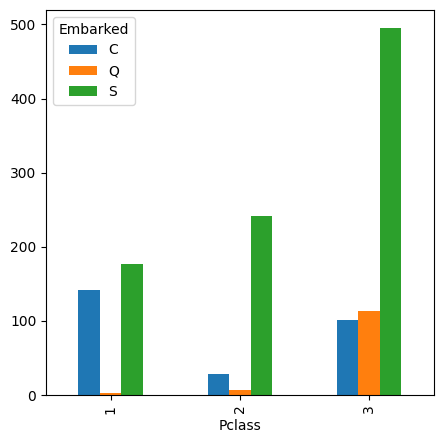

In [ ]:
plt.rcParams['figure.figsize'] =[5,5]
pd.crosstab(index = df_titanic['Pclass'], columns = df_titanic['Embarked']).plot(kind='bar')
plt.show()

In [ ]:
pd.crosstab(index=df_titanic['Pclass'],
            columns=df_titanic['Sex'],
            values=df_titanic['Fare'],
            aggfunc=np.mean)

Sex,female,male
Pclass,,
1,109.412385,69.888385
2,23.234827,19.904946
3,15.324250,12.415462


In [ ]:
df_titanic.pivot_table(values='Fare',
                     index='Embarked',
                     columns='Sex',
                     aggfunc=np.mean)

Sex,female,male
Embarked,,
C,81.128540,48.810619
Q,12.550837,12.273941
S,39.339305,21.841878


In [ ]:
df_titanic.groupby(['Embarked','Sex'])['Fare'].mean()

Embarked  Sex   
C         female    81.128540
          male      48.810619
Q         female    12.550837
          male      12.273941
S         female    39.339305
          male      21.841878
Name: Fare, dtype: float64

**Multivariate Analysis**

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

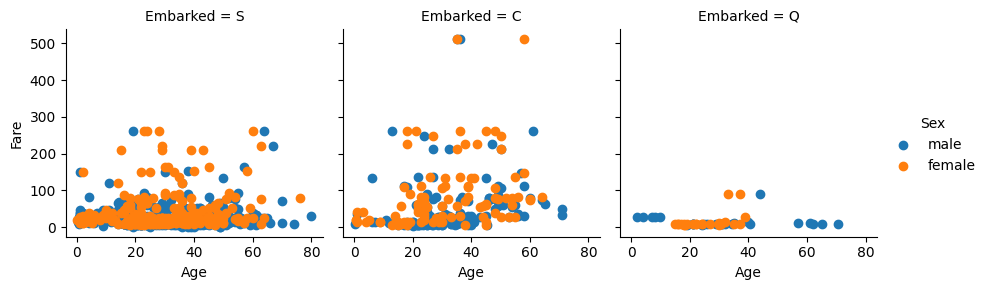

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='Embarked',hue='Sex')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

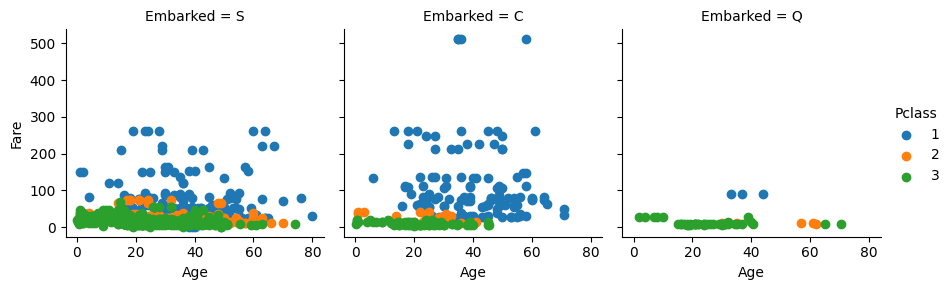

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='Embarked',hue='Pclass')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

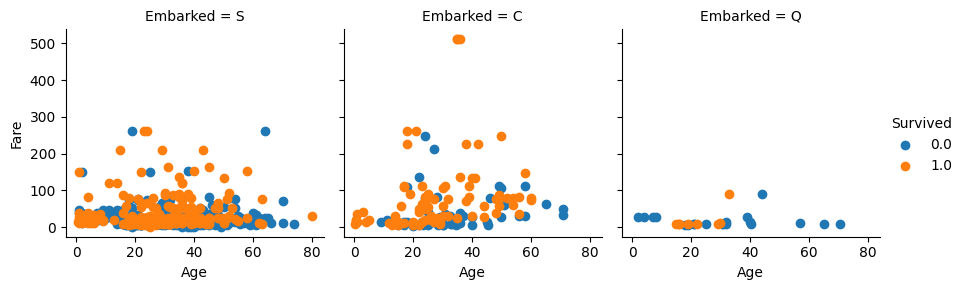

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='Embarked',hue='Survived')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

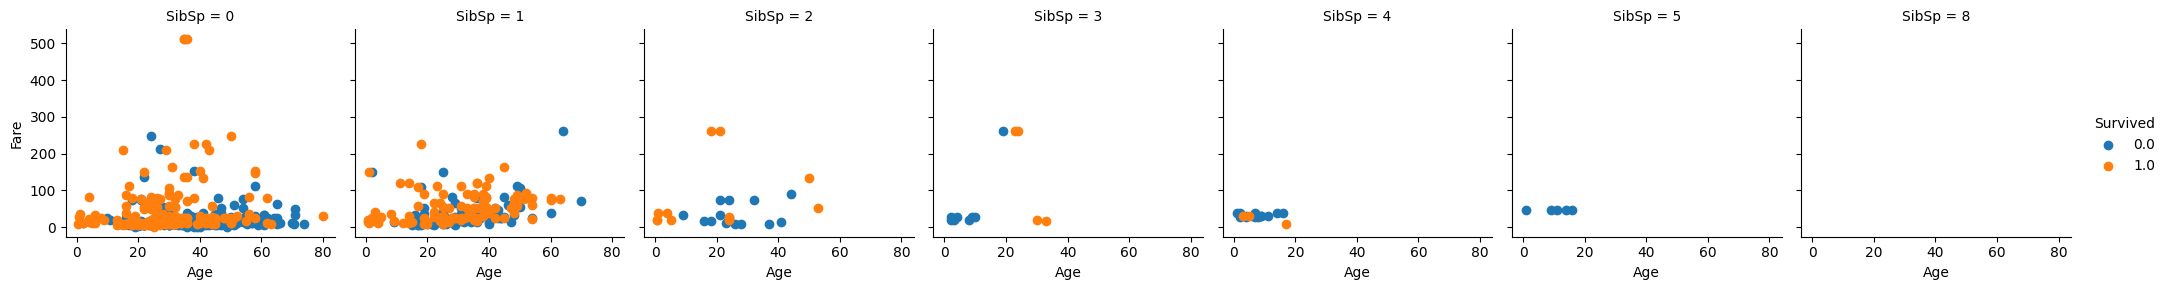

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='SibSp',hue='Survived')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

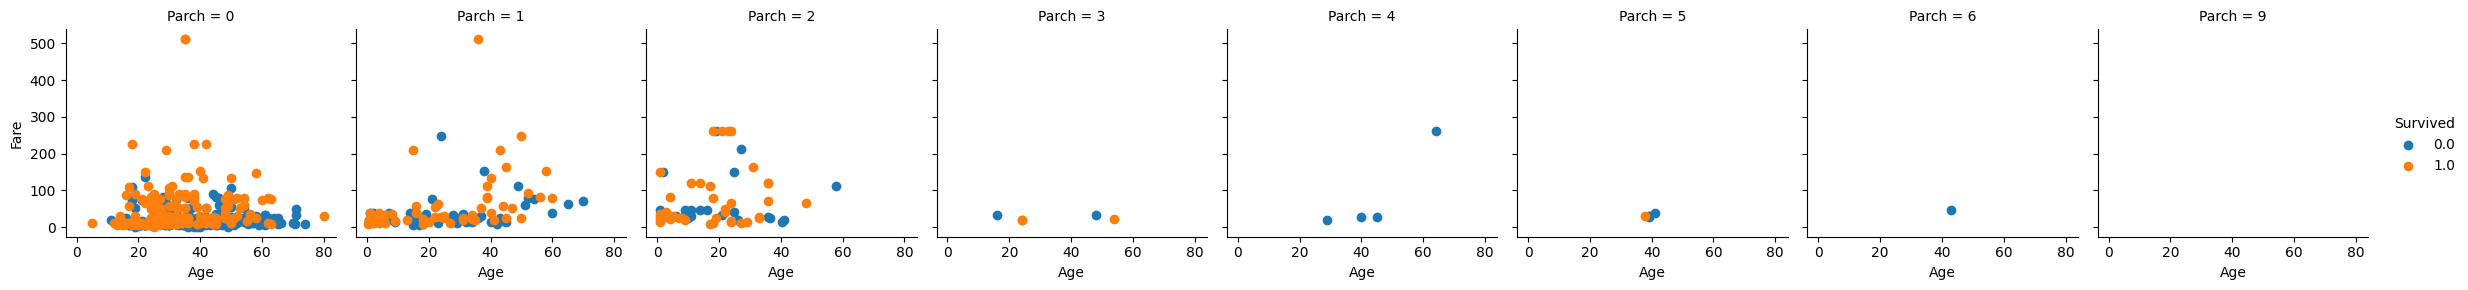

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='Parch',hue='Survived')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

### Missing Values

In [ ]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# to know the percent of missing values
((df_titanic.isnull().sum() /df_titanic.index.size) *100).sort_values(ascending=False)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

**Automated EDA**

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.6 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=e68809d50f05e554a5f5316985fa4aa37418367ed1c94b133cc79c629c6b35e3
  Stored in directory:

In [ ]:
import dtale
dtale.show(df_titanic)

http://2690671302bb:40000/dtale/main/1

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=d9fa2b4c4653b56190062b4c7770f89e1863d1cb0c6c7600735a70e239d4ab0b
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=61d21bbf14c36efbdef4e0392ff8f7afb829686f9d19f3431e82b644161dab25
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
df_titanic.groupby("Sex")['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


One way is to look at the median age and replace wherever you have male with median age and female with their median age.

In [ ]:
from fancyimpute import KNN,IterativeImputer

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [ ]:
num_cols = df_titanic.select_dtypes(np.number)
num_cols=num_cols[['Age','Fare']]

In [ ]:
sc=StandardScaler()
df_num_sc = pd.DataFrame(sc.fit_transform(num_cols),columns =num_cols.columns)
df_num_sc.head()

,Age,Fare
0,-0.547050,-0.503402
1,0.563552,0.734222
2,-0.269400,-0.490356
3,0.355314,0.382778
4,0.355314,-0.487940


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_num_sc['Age'] = imputer.fit_transform(pd.DataFrame(df_num_sc['Age']))

df_num_sc['Fare'] = imputer.fit_transform(pd.DataFrame(df_num_sc['Fare']))


In [ ]:
# Using Inverse_transform method
df_num = pd.DataFrame(sc.inverse_transform(df_num_sc),columns=df_num_sc.columns)
df_num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**we are leaving out fare and age as these are continuos variable**

In [ ]:
df_others = df_titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked']]

In [ ]:
df_titanic = pd.concat([df_num,df_others],axis=1)

In [ ]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_titanic['Embarked']= imp.fit_transform(pd.DataFrame(df_titanic['Embarked']))

In [ ]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          0
dtype: int64

### Feature Engineering

Lets make use of Cabin Column with respect to Pclass
1. Is there a better way than dropping the column.
2. Lets build relationship between PClass and Cabin.

In [ ]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_titanic.groupby("Pclass")['Cabin'].describe()

,count,unique,top,freq
Pclass,,,,
1,256,168,C23 C25 C27,6
2,23,9,F33,4
3,16,9,G6,5


Inference:
1. All the classes were given Cabin. Though we have some missing values.
2. Are these values genuine. Or they weren't collected at all.

In [ ]:
 pd.crosstab(df_titanic['Pclass'],df_titanic['Cabin'])

Cabin,A10,A11,A14,A16,A18,A19,A20,A21,A23,A24,A26,A29,A31,A32,A34,A36,A5,A6,A7,A9,B10,B101,B102,B11,B18,...,E44,E45,E46,E49,E50,E52,E58,E60,E63,E67,E68,E77,E8,F,F E46,F E57,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,2,...,2,1,2,1,2,1,1,1,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,4,0,4,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,0,0,1,0,5,0


In [ ]:
df_titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
df_titanic.groupby("Pclass")['Ticket'].describe()

,count,unique,top,freq
Pclass,,,,
1,323,188,PC 17608,7
2,277,192,S.O.C. 14879,7
3,709,549,CA. 2343,11


In [ ]:
df_g1 = df_titanic.groupby("Pclass")
df_g1.get_group(1).describe()

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,323.000000,323.000000,323.00000,323.0,323.000000,323.000000
mean,38.039580,87.508992,672.49226,1.0,0.436533,0.365325
std,13.970676,80.447178,368.72570,0.0,0.609064,0.715602
min,0.920000,0.000000,2.00000,1.0,0.000000,0.000000
25%,29.881138,30.695800,347.00000,1.0,0.000000,0.000000
50%,36.000000,60.000000,670.00000,1.0,0.000000,0.000000
75%,48.000000,107.662500,973.50000,1.0,1.000000,0.500000
max,80.000000,512.329200,1306.00000,1.0,3.000000,4.000000


In [ ]:
df_g1.get_group(2).describe()

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,277.000000,277.000000,277.000000,277.0,277.000000,277.000000
mean,29.528333,21.179196,671.566787,2.0,0.393502,0.368231
std,13.237693,13.607122,383.707495,0.0,0.590100,0.692717
min,0.670000,0.000000,10.000000,2.0,0.000000,0.000000
25%,23.000000,13.000000,341.000000,2.0,0.000000,0.000000
50%,29.000000,15.045800,671.000000,2.0,0.000000,0.000000
75%,36.000000,26.000000,1035.000000,2.0,1.000000,1.000000
max,70.000000,73.500000,1298.000000,2.0,3.000000,3.000000


In [ ]:
df_g1.get_group(3).describe()

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,709.000000,709.000000,709.000000,709.0,709.000000,709.000000
mean,26.302224,13.331087,640.558533,3.0,0.568406,0.400564
std,10.310818,11.510752,379.887782,0.0,1.299681,0.981639
min,0.170000,0.000000,1.000000,3.0,0.000000,0.000000
25%,21.000000,7.750000,302.000000,3.0,0.000000,0.000000
50%,29.881138,8.050000,644.000000,3.0,0.000000,0.000000
75%,29.881138,15.245800,971.000000,3.0,1.000000,0.000000
max,74.000000,69.550000,1309.000000,3.0,8.000000,9.000000


In [ ]:
df_g1.get_group(1)

,Age,Fare,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
1,38.0,71.2833,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C
3,35.0,53.1000,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S
6,54.0,51.8625,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,S
11,58.0,26.5500,12,1.0,1,"Bonnell, Miss. Elizabeth",female,0,0,113783,S
23,28.0,35.5000,24,1.0,1,"Sloper, Mr. William Thompson",male,0,0,113788,S
...,...,...,...,...,...,...,...,...,...,...,...
1294,17.0,47.1000,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,0,0,113059,S
1295,43.0,27.7208,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,1,0,17765,C
1298,50.0,211.5000,1299,NaN,1,"Widener, Mr. George Dunton",male,1,1,113503,C
1302,37.0,90.0000,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,1,0,19928,Q


In [ ]:
df_g1.get_group(2)


,Age,Fare,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
9,14.000000,30.0708,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,C
15,55.000000,16.0000,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,0,0,248706,S
17,29.881138,13.0000,18,1.0,2,"Williams, Mr. Charles Eugene",male,0,0,244373,S
20,35.000000,26.0000,21,0.0,2,"Fynney, Mr. Joseph J",male,0,0,239865,S
21,34.000000,13.0000,22,1.0,2,"Beesley, Mr. Lawrence",male,0,0,248698,S
...,...,...,...,...,...,...,...,...,...,...,...
1278,57.000000,13.0000,1279,NaN,2,"Ashby, Mr. John",male,0,0,244346,S
1284,47.000000,10.5000,1285,NaN,2,"Gilbert, Mr. William",male,0,0,C.A. 30769,S
1292,38.000000,21.0000,1293,NaN,2,"Gale, Mr. Harry",male,1,0,28664,S
1296,20.000000,13.8625,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,0,0,SC/PARIS 2166,C


In [ ]:
df_pclass3= df_g1.get_group(3)
df_pclass3

,Age,Fare,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,22.000000,7.2500,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S
2,26.000000,7.9250,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S
4,35.000000,8.0500,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,S
5,29.881138,8.4583,6,0.0,3,"Moran, Mr. James",male,0,0,330877,Q
7,2.000000,21.0750,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,S
...,...,...,...,...,...,...,...,...,...,...,...
1303,28.000000,7.7750,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,0,0,347086,S
1304,29.881138,8.0500,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,S
1306,38.500000,7.2500,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,S
1307,29.881138,8.0500,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,S


In [ ]:
df_pclass3['Ticket']

0                A/5 21171
2         STON/O2. 3101282
4                   373450
5                   330877
7                   349909
               ...        
1303                347086
1304             A.5. 3236
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 709, dtype: object

Inference:
1. No such pattern is visible with Ticket and Class of passenger.
2. If there was any, then we could have retained the column.

Lets look at the Age column.

In [ ]:
df_titanic['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

<Axes: >

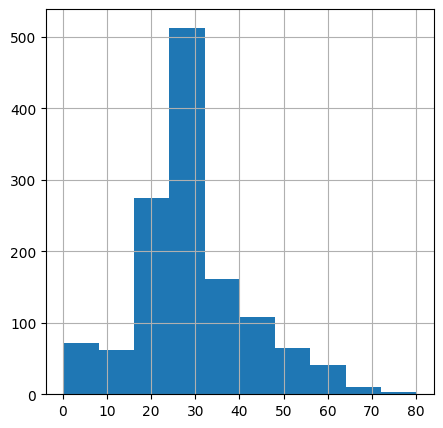

In [ ]:
df_titanic['Age'].hist()

In [ ]:
bins = [0,15,20,35,55,85]
labels =['Young' , 'Teenager' , 'Adults-Young','Adults-Middle', 'Adults-Old']

df_titanic['Age_Group'] = pd.cut(df_titanic['Age'], bins=bins, labels=labels, include_lowest=True)
df_titanic.head()

,Age,Fare,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_Group
0,22.0,7.2500,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,Adults-Young
1,38.0,71.2833,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,Adults-Middle
2,26.0,7.9250,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,Adults-Young
3,35.0,53.1000,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,Adults-Young
4,35.0,8.0500,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,S,Adults-Young


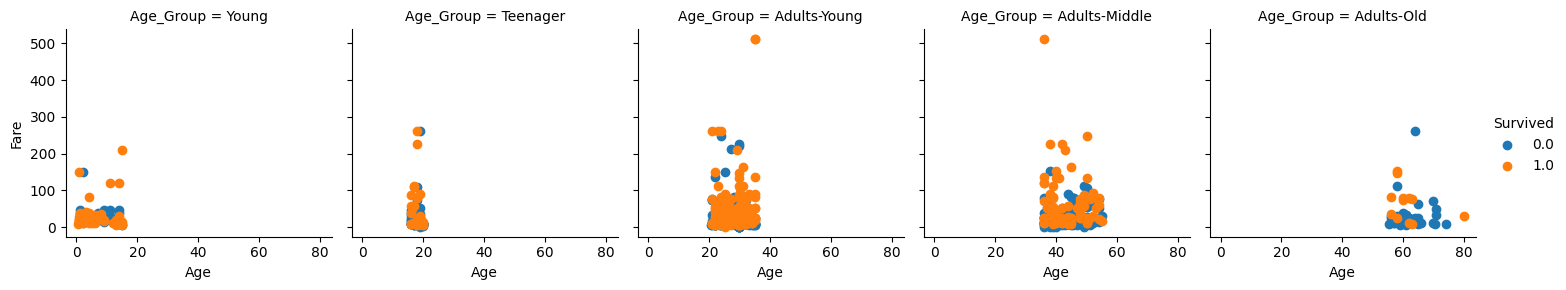

In [ ]:
titanicplot= sns.FacetGrid(df_titanic,col='Age_Group',hue='Survived')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

<Axes: >

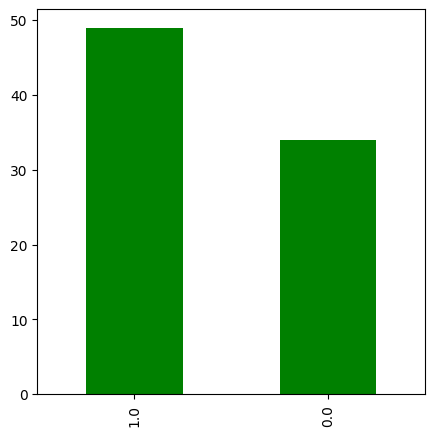

In [ ]:
df_AG = df_titanic.groupby("Age_Group")
df_AG.get_group('Young')['Survived'].value_counts().plot(kind='bar',color='green')

<Axes: >

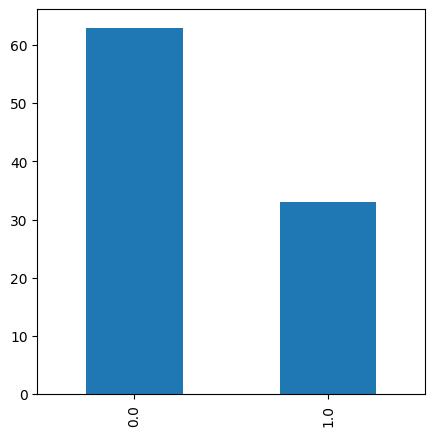

In [ ]:
df_AG.get_group('Teenager')['Survived'].value_counts().plot(kind='bar')

<Axes: >

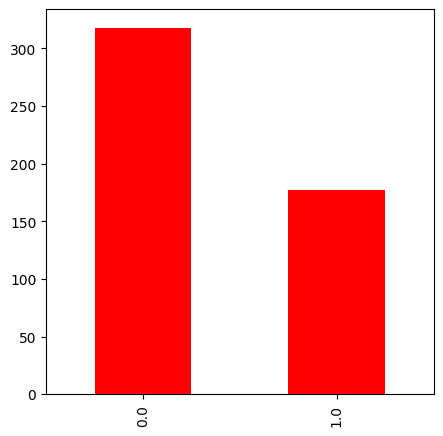

In [ ]:
df_AG.get_group('Adults-Young')['Survived'].value_counts().plot(kind='bar',color='red')

<Axes: >

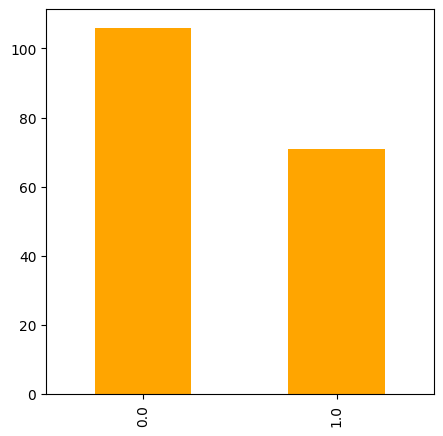

In [ ]:
df_AG.get_group('Adults-Middle')['Survived'].value_counts().plot(kind='bar',color='orange')

<Axes: xlabel='Survived,Sex'>

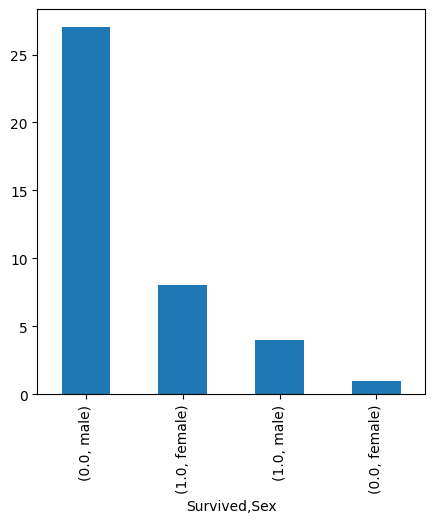

In [ ]:
df_AG.get_group('Adults-Old')[['Survived','Sex']].value_counts().plot(kind='bar')

## Automated EDA

In [ ]:
# pip install pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport
# profile =ProfileReport(df_titanic)

In [ ]:
# !pip install ydata-profiling

In [ ]:
# pip install pandas-profiling
#pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport


In [ ]:
# from ydata_profiling.model.summarizer import PandasProfilingSummarizer
# profile = ProfileReport(df_titanic)
# profile

**Dropping of the columns**

In [ ]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Embarked', 'Age_Group'],
      dtype='object')

In [ ]:
df_titanicNew = df_titanic.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [ ]:
df_titanicNew.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,0.0,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1.0,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,1.0,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1.0,1,female,1,0,S,Adults-Young
4,35.0,8.0500,0.0,3,male,0,0,S,Adults-Young


**Split the Data in the same proportions as the original Data**

In [ ]:
print("Training Data", train.shape)
print("Testing Data", test.shape)

Training Data (891, 12)
Testing Data (418, 11)


Pull the data upto 891 records. The number of columns have changed.

In [ ]:
df_train = df_titanicNew.iloc[0:train.shape[0],]
df_train.shape

(891, 9)

In [ ]:
df_train.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,0.0,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1.0,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,1.0,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1.0,1,female,1,0,S,Adults-Young
4,35.0,8.0500,0.0,3,male,0,0,S,Adults-Young


In [ ]:
df_test = df_titanicNew.iloc[train.shape[0] :,]
df_test.shape

(418, 9)

In [ ]:
df_test.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
891,34.5,7.8292,NaN,3,male,0,0,Q,Adults-Young
892,47.0,7.0000,NaN,3,female,1,0,S,Adults-Middle
893,62.0,9.6875,NaN,2,male,0,0,Q,Adults-Old
894,27.0,8.6625,NaN,3,male,0,0,S,Adults-Young
895,22.0,12.2875,NaN,3,female,1,1,S,Adults-Young


**We are testing the accuracy of the models. The Target variable should not be in the Test data.**

In [ ]:
df_test.drop("Survived",axis=1,inplace=True)

In [ ]:
df_test.shape

(418, 8)

In [ ]:
df_train.dtypes

Age           float64
Fare          float64
Survived       object
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

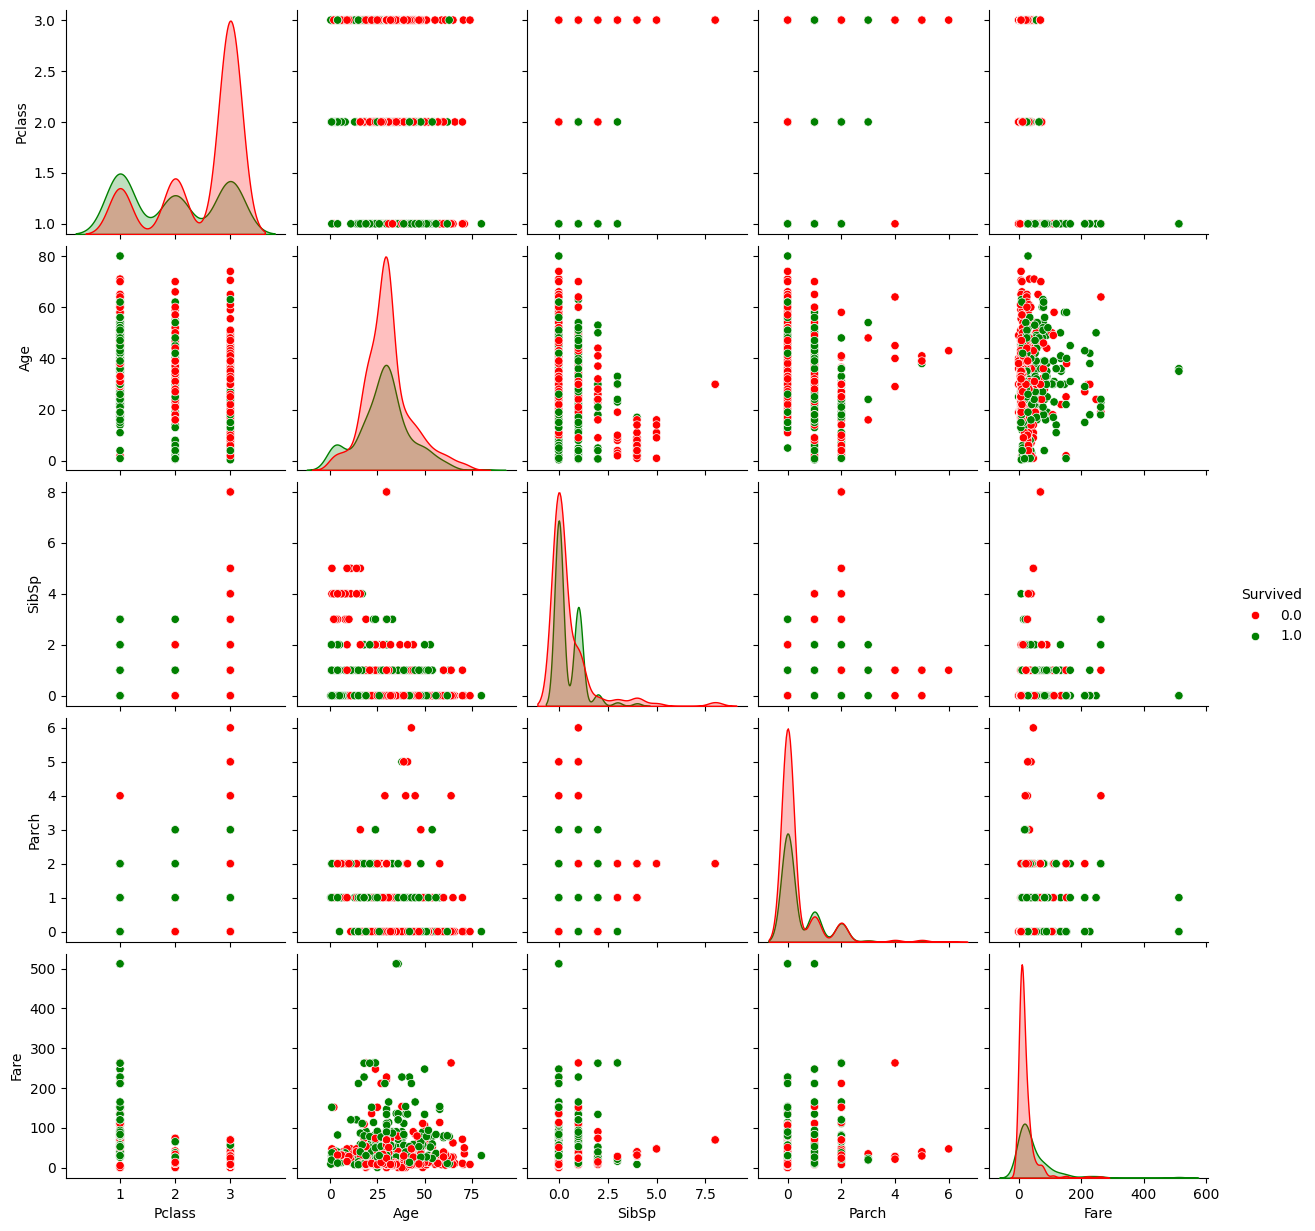

In [ ]:
sns.pairplot(df_train,vars=['Pclass',	'Age','SibSp','Parch','Fare'],hue='Survived',
             palette=['Red','Green']);
plt.show()

**Correlation**

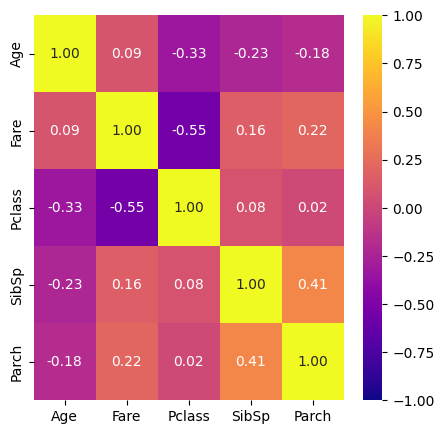

In [ ]:
plt.subplots(figsize=(5,5))
sns.heatmap(df_train.corr(), annot=True,fmt='.2f',cmap='plasma',vmin=-1,vmax=1)
plt.show()

**Statistical Test**

In [ ]:
import scipy.stats as st

1. statistically the correlation b/w two numerical variables
2. Do Correlation test and infer based on p - vlaue( if p- value <0.05 --> significant)

In [ ]:
df_train.columns

Index(['Age', 'Fare', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'Age_Group'],
      dtype='object')

In [ ]:
cor_test= ['Age','Fare']

for i in cor_test:
  teststats,pvalue  =  st.pearsonr(df_train[i],
                                   df_train['Survived'].astype(int))
  print("Pvalue is",pvalue)

Pvalue is 0.035838299871154985
Pvalue is 6.120189341924608e-15


Both Age and Fare are important

**CHI SQUARE TEST**

In [ ]:
## Chi-Square test:

# H0: no association between categorical variable;

# H1: there is association between categorical variable



In [ ]:
 st.chi2_contingency(pd.crosstab(df_train['Pclass'],df_train['Survived']))

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [ ]:
chi_test= ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Age_Group']

for i in chi_test:
  teststats,pvalue,dof,expected_freq = st.chi2_contingency(pd.crosstab(df_train[i],
                                                                      df_train['Survived']))
  print("Pvalue is",pvalue)


Pvalue is 4.549251711298793e-23
Pvalue is 1.1973570627755645e-58
Pvalue is 1.5585810465902147e-06
Pvalue is 9.703526421039997e-05
Pvalue is 2.3008626481449577e-06
Pvalue is 0.0009955378235861937


All the above pvalue indicates all the variables are important

**Model Building**

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Neural Network
5. Ada Boost
6. Gradient Boosting
7. Xtreme Gradient Boosting

In [ ]:
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier


In [ ]:
df_train['Survived'] = df_train['Survived'].astype(int)

In [ ]:
X=df_train.drop("Survived", axis=1)
y=df_train['Survived']

In [ ]:
X.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1,female,1,0,S,Adults-Young
4,35.0,8.0500,3,male,0,0,S,Adults-Young


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Neural Network**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X.dtypes

Age           float64
Fare          float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

**Bifurcating the Numerical and Categorical Data for Train Dataset**

In [ ]:
num_data =X[['Age','Fare']]
cat_data =X[['Pclass','Sex','SibSp','Parch','Embarked','Age_Group']]

**Scaling the Numerical Data for Train Dataset**

In [ ]:
ss=StandardScaler()
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
num_scaled=ss.fit_transform(num_data)

num_scaled      = pd.DataFrame(num_scaled,columns=num_data.columns)

In [ ]:
num_scaled.head()

,Age,Fare
0,-0.595254,-0.502445
1,0.635996,0.786845
2,-0.287441,-0.488854
3,0.405137,0.420730
4,0.405137,-0.486337


**Encoding for Train Dataset**

In [ ]:
cat_dummy= pd.get_dummies(cat_data,drop_first=True)
cat_dummy.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,3,1,0,1,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,1,0,0
4,3,0,0,1,0,1,0,1,0,0


**Concatenating Data (Numerical and Categorical ) for Train Dataset**

In [ ]:
X_scaled = pd.concat([num_scaled,cat_dummy],axis=1)
X_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,-0.595254,-0.502445,3,1,0,1,0,1,0,1,0,0
1,0.635996,0.786845,1,1,0,0,0,0,0,0,1,0
2,-0.287441,-0.488854,3,0,0,0,0,1,0,1,0,0
3,0.405137,0.420730,1,1,0,0,0,1,0,1,0,0
4,0.405137,-0.486337,3,0,0,1,0,1,0,1,0,0


In [ ]:
X_scaled.shape

(891, 12)

**Scaling the Numerical Data for Test Dataset**

In [ ]:
df_test.columns

Index(['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Age_Group'],
      dtype='object')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        418 non-null    float64 
 1   Fare       418 non-null    float64 
 2   Pclass     418 non-null    int64   
 3   Sex        418 non-null    object  
 4   SibSp      418 non-null    int64   
 5   Parch      418 non-null    int64   
 6   Embarked   418 non-null    object  
 7   Age_Group  418 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 23.6+ KB


In [ ]:
df_test.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
891,34.5,7.8292,3,male,0,0,Q,Adults-Young
892,47.0,7.0000,3,female,1,0,S,Adults-Middle
893,62.0,9.6875,2,male,0,0,Q,Adults-Old
894,27.0,8.6625,3,male,0,0,S,Adults-Young
895,22.0,12.2875,3,female,1,1,S,Adults-Young


In [ ]:
num_data_test =df_test[['Age','Fare']]
cat_data_test =df_test[['Pclass','Sex','SibSp','Parch','Embarked','Age_Group']]

In [ ]:
num_data_test.shape


(418, 2)

In [ ]:
num_scaled_test=ss.transform(num_data_test)
num_scaled_test = pd.DataFrame(num_scaled_test,columns=num_data_test.columns)

In [ ]:
num_scaled_test

,Age,Fare
0,0.366660,-0.490783
1,1.328575,-0.507479
2,2.482872,-0.453367
3,-0.210488,-0.474005
4,-0.595254,-0.401017
...,...,...
413,0.011224,-0.486337
414,0.712950,1.544246
415,0.674473,-0.502445
416,0.011224,-0.486337


**Encoding for Test Dataset**

In [ ]:
cat_dummy_test= pd.get_dummies(cat_data_test,drop_first=True)
cat_dummy_test.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
891,3,0,0,1,1,0,0,1,0,0
892,3,1,0,0,0,1,0,0,1,0
893,2,0,0,1,1,0,0,0,0,1
894,3,0,0,1,0,1,0,1,0,0
895,3,1,1,0,0,1,0,1,0,0


In [ ]:
cat_dummy_test.reset_index(inplace=True,drop=True)

In [ ]:
cat_dummy_test.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,3,0,0,1,1,0,0,1,0,0
1,3,1,0,0,0,1,0,0,1,0
2,2,0,0,1,1,0,0,0,0,1
3,3,0,0,1,0,1,0,1,0,0
4,3,1,1,0,0,1,0,1,0,0


**Concatenating Data (Numerical and Categorical ) for Test Dataset**

In [ ]:
df_test_scaled = pd.concat([num_scaled_test,cat_dummy_test], axis=1)
df_test_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,0.366660,-0.490783,3,0,0,1,1,0,0,1,0,0
1,1.328575,-0.507479,3,1,0,0,0,1,0,0,1,0
2,2.482872,-0.453367,2,0,0,1,1,0,0,0,0,1
3,-0.210488,-0.474005,3,0,0,1,0,1,0,1,0,0
4,-0.595254,-0.401017,3,1,1,0,0,1,0,1,0,0


In [ ]:
df_test_scaled.shape

(418, 12)

**Procedure for all Models that do not require scaled Data**

**Encoding for Non Scaled Data**

1. Pclass - we will leave it as it is. Its already label encoded with priority.

In [ ]:
X.dtypes


Age           float64
Fare          float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

In [ ]:
X= pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()
X.shape

(891, 12)

1. Overall 3 columns have increased.

We also need to encode the test data.

In [ ]:
df_test.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
891,34.5,7.8292,3,male,0,0,Q,Adults-Young
892,47.0,7.0000,3,female,1,0,S,Adults-Middle
893,62.0,9.6875,2,male,0,0,Q,Adults-Old
894,27.0,8.6625,3,male,0,0,S,Adults-Young
895,22.0,12.2875,3,female,1,1,S,Adults-Young


In [ ]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test.shape

(418, 12)

In [ ]:
df_test.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
891,34.5,7.8292,3,0,0,1,1,0,0,1,0,0
892,47.0,7.0000,3,1,0,0,0,1,0,0,1,0
893,62.0,9.6875,2,0,0,1,1,0,0,0,0,1
894,27.0,8.6625,3,0,0,1,0,1,0,1,0,0
895,22.0,12.2875,3,1,1,0,0,1,0,1,0,0


In [ ]:
kfold = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state=0)

**Logistic Regression**

In [ ]:
lgr = LogisticRegression()

In [ ]:
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]


  lgr.fit(x_train,y_train)
  y_pred.append(lgr.predict(df_test))



In [ ]:
X.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,22.0,7.2500,3,1,0,1,0,1,0,1,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,1,0
2,26.0,7.9250,3,0,0,0,0,1,0,1,0,0
3,35.0,53.1000,1,1,0,0,0,1,0,1,0,0
4,35.0,8.0500,3,0,0,1,0,1,0,1,0,0


In [ ]:
y_pred

[array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
pd.DataFrame(y_pred).shape

(5, 418)

1. Below are the 418 rows and this value has been predicted 5 time using KFold. Hence every column represents the number of interactions. Each row represents the predictions made for each row.
2. We will take the mode at the every row level.

In [ ]:
pd.DataFrame(y_pred).T

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
413,0,0,0,0,0
414,1,1,1,1,1
415,0,0,0,0,0
416,0,0,0,0,0


1. By taking mode at the row level, we take the predicted value.

In [ ]:
pd.DataFrame(y_pred).T.mode(axis=1)

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
y_log=pd.DataFrame(y_pred).T.mode(axis=1)

**Basic Model**

In [ ]:
model_prediction = pd.DataFrame({"PassengerId":test.PassengerId,
                                 "Survived":test.Sex})
model_prediction

,PassengerId,Survived
0,892,male
1,893,female
2,894,male
3,895,male
4,896,female
...,...,...
413,1305,male
414,1306,female
415,1307,male
416,1308,male


In [ ]:
model_prediction.to_csv("Basic.csv",index=False)

In [ ]:
model_prediction['Survived']=y_log

In [ ]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
model_prediction.to_csv("LogisticReg.csv",index=False)

**Decision Tree**

In [ ]:
dt=DecisionTreeClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  dt.fit(x_train,y_train)
  y_pred.append(dt.predict(df_test))

In [ ]:
y_dt=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_dt
model_prediction.to_csv("DecisionTree.csv",index=False)


**Random Forest**

In [ ]:
rf=RandomForestClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  rf.fit(x_train,y_train)
  y_pred.append(rf.predict(df_test))

In [ ]:
y_rf=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_rf
model_prediction.to_csv("RandomForest.csv",index=False)

**Ada Boost**

In [ ]:
ada=AdaBoostClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  ada.fit(x_train,y_train)
  y_pred.append(ada.predict(df_test))

In [ ]:
y_ada=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_ada
model_prediction.to_csv("AdaBoost.csv",index=False)

**Gradient Boosting**

In [ ]:
gbm=GradientBoostingClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  gbm.fit(x_train,y_train)
  y_pred.append(gbm.predict(df_test))

In [ ]:
y_gbm=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_gbm
model_prediction.to_csv("GradientBoost.csv",index=False)

**Xtreme Gradient Boosting**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  xgb.fit(x_train,y_train)
  y_pred.append(xgb.predict(df_test))

In [ ]:
y_xgb=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_xgb
model_prediction.to_csv("XtremeGradientBoost.csv",index=False)

**Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

**Revisiting the scaled Data**

In [ ]:
X_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,-0.595254,-0.502445,3,1,0,1,0,1,0,1,0,0
1,0.635996,0.786845,1,1,0,0,0,0,0,0,1,0
2,-0.287441,-0.488854,3,0,0,0,0,1,0,1,0,0
3,0.405137,0.420730,1,1,0,0,0,1,0,1,0,0
4,0.405137,-0.486337,3,0,0,1,0,1,0,1,0,0


In [ ]:
df_test_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,0.366660,-0.490783,3,0,0,1,1,0,0,1,0,0
1,1.328575,-0.507479,3,1,0,0,0,1,0,0,1,0
2,2.482872,-0.453367,2,0,0,1,1,0,0,0,0,1
3,-0.210488,-0.474005,3,0,0,1,0,1,0,1,0,0
4,-0.595254,-0.401017,3,1,1,0,0,1,0,1,0,0


In [ ]:
ANN=MLPClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X_scaled,y):
  x_train = X_scaled.loc[train_index]
  y_train = y.loc[train_index]

  ANN.fit(x_train,y_train)
  y_pred.append(ANN.predict(df_test_scaled))

In [ ]:
y_ANN=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_ANN
model_prediction.to_csv("NeuralNetwork.csv",index=False)

**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bgc=BaggingClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  bgc.fit(x_train,y_train)
  y_pred.append(bgc.predict(df_test))

In [ ]:
y_bgc=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_bgc
model_prediction.to_csv("Bagging.csv",index=False)

**Tuning the Parameters for better results**

**Lets Choose the Best models for Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb = XGBClassifier(random_state=0,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,500,50),
            'min_samples_split':[3,5,7,9,11],
            'max_depth':[3,5,7,9,11],
            'scale_pos_weight':[0,1,2,3,4,5,10],
            'learning_rate':[0.01,0.001,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           } # scale_pos_weight is the ratio of negative to positive class

In [ ]:
random_cv = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   n_jobs = -1,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=0)

In [ ]:
random_cv.fit(X,y)



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 3, 5],
                                        'learning_rate': [0.01, 0.001, 0.1, 0.2,
                                                          0.05],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_samples_split': [3, 5, 7, 9, 11],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'scale_pos_weight': [0, 1, 2, 3, 4, 5,
                                                             10],
                                        'subsample': [0.7, 0.8, 0.9, 1]},
                   random_state=0, scoring='accuracy')

In [ ]:
random_cv.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 1,
 'n_estimators': 450,
 'min_samples_split': 11,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0}

In [ ]:
xgb_tuned=XGBClassifier(subsample= 0.7,
                        scale_pos_weight= 1,
                        n_estimators= 450,
                        min_samples_split = 11,
                        max_depth = 5,
                        learning_rate= 0.01,
                        gamma= 0)
y_pred=[]

for train_index,test_index in kfold.split(X,y):
  x_train = X.loc[train_index]
  y_train = y.loc[train_index]

  xgb_tuned.fit(x_train,y_train)
  y_pred.append(xgb_tuned.predict(df_test))

In [ ]:
y_xgb=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_xgb
model_prediction.to_csv("XtremeGradientBoost_Tuned.csv",index=False)